# Additional TensorFlow Features

## Table of Contents

1. TensorFlow - A Suite of Softwares
2. TFLearn - A high level machine learning library
3. Build Linear regression using TFLearn on Height and Weight dataset
4. TensorBoard - A data and model visualization

## 1. TensorFlow - A Suite of Softwares

Tensorflow is a much more evolved library than just a machine learning library. It provides the complete package for training and maintaining a machine learning model, from data ingestion itself.

It provides the following features necessary for building a machine learning model from ground up:
* **TFRecords** - for reading and ingesting data
* **TF.layers** - provides components of neural network for creating custom neural networks
* **TFLearn** - A third party library built on tensorflow for creating machine learning models
* **TF.contrib.keras** - another high level library for building neural networks
* **Tensorboard** - for data and model visualization
* **TFDebug** - for debugging tensorflow models
* **TFServe** - for deploying machine learning models built upon tensorflow

We will take a look at some of the important features that are useful tools to keep in our workflow

## 2. TFLearn - A high level deep learning library

TFLearn is actually a third party library. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.

![](images/image_4.png)

TFLearn features include:

* Easy-to-use and understand high-level API for implementing deep neural networks, with tutorial and examples.
* Fast prototyping through highly modular built-in neural network layers, regularizers, optimizers, metrics...
* Full transparency over Tensorflow. All functions are built over tensors and can be used independently of TFLearn.
* Powerful helper functions to train any TensorFlow graph, with support of multiple inputs, outputs and optimizers.
* Easy and beautiful graph visualization, with details about weights, gradients, activations and more...
* Effortless device placement for using multiple CPU/GPU.


To get a taste of TFLearn, let us apply it on a dataset. 

## 3. Build Linear regression using TFlearn on Height and Weight dataset

In [1]:
# import libraries
% pylab inline
import tensorflow as tf
import tflearn
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
# load data
data = pd.read_csv('datasets/height_n_weight/height_n_weight.csv')

# show top data fields
data.head()

,height,weight
0,182,77
1,161,58
2,161,53
3,177,68
4,157,59


In [3]:
# define dependent and independent variables
train_x = data.height.values.ravel()
train_y = data.weight.values.ravel()

num_records = data.shape[0]

print("Shape of data: "+str(data.shape))
print("Number of records: "+str(num_records))

Shape of data: (199, 2)
Number of records: 199


In [4]:
# create model
input_data = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_data)

lin_reg = tflearn.regression(linear, optimizer='sgd', loss='mean_square', learning_rate=0.01)

model = tflearn.DNN(lin_reg)

In [5]:
# train model
model.fit(train_x, train_y, n_epoch=100)

Training Step: 399  | total loss: 138.43910 | time: 0.004s
| SGD | epoch: 100 | loss: 138.43910 -- iter: 192/199
Training Step: 400  | total loss: 143.98834 | time: 0.006s
| SGD | epoch: 100 | loss: 143.98834 -- iter: 199/199
--


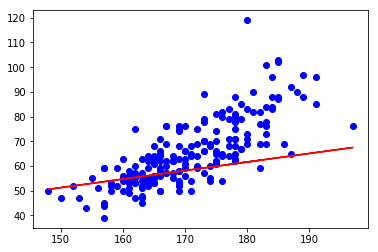

In [6]:
# display graph
plt.plot(train_x, train_y, 'bo')
plt.plot(train_x, model.get_weights(linear.W) * train_x + model.get_weights(linear.b), 'r')
plt.show()

## 4. TensorBoard - A data and model visualization

TensorBoard is a suite of web applications for inspecting and understanding your TensorFlow runs and graphs. The computations you'll use TensorFlow for - like training a massive deep neural network - can be complex and confusing. To make it easier to understand, debug, and optimize TensorFlow programs, we've included a suite of visualization tools called TensorBoard. You can use TensorBoard to visualize your TensorFlow graph, plot quantitative metrics about the execution of your graph, and show additional data like images that pass through it. 

Let us see an example of using TensorBoard

We wrote a code previously for adding two numbers. Let us visualize how the computational graph looks like

In [7]:
# import tensorflow
import tensorflow as tf
tf.reset_default_graph()

In [8]:
# build computational graph
num1 = tf.constant(2, dtype=tf.int16, name='num1')
num2 = tf.constant(3, dtype=tf.int16, name='num2')

addition = tf.add(num1, num2)

In [9]:
# initialize variables
init = tf.global_variables_initializer()

In [10]:
# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    # write summary of graph on tensorboard
    writer = tf.summary.FileWriter("./outputs/tensorflow_logs",sess.graph)
    print("Addition of 2 and 3 is %i" % sess.run(addition))

Addition of 2 and 3 is 5


In [11]:
# close
writer.close()
sess.close()

Go to cmd prompt and type
* tensorboard --logdir='path/output/tensorflow_logs'

TensorBoard 0.4.0rc3 at http://<computer name>:6006 (Press CTRL+C to quit)

Type http://<computer name>:6006 link to your internet browser, it will direct you to tensorboard
![](images/tensorboard_graph.png)

### Exercise 1:

Visualize the graph for exercise 2 of module 1

In [12]:
# Visualize the graph 
a = tf.Variable([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b = tf.placeholder(tf.int32, shape = (3, 3))

c = tf.matmul(a, b)

init = tf.global_variables_initializer(); # already run above

with tf.Session() as sess:
    sess.run(init)
    # write summary of graph on tensorboard
    writer = tf.summary.FileWriter("./outputs/tensorflow_logs",sess.graph)
    print("Result is: "+str(sess.run(c, feed_dict={b: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]})))

writer.close()
sess.close()

Result is: [[1 2 3]
 [4 5 6]
 [7 8 9]]


##### Output graph
![](images/graph_Ex1.png)

## Bonus: TFLearn with TensorBoard

In [13]:
tf.reset_default_graph()

In [14]:
# create model
input_data = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_data)

lin_reg = tflearn.regression(linear, optimizer='sgd', loss='mean_square', learning_rate=0.01)

model = tflearn.DNN(lin_reg)
model = tflearn.DNN(lin_reg, tensorboard_verbose=3, tensorboard_dir='./outputs/tflearn')

In [15]:
# train model
model.fit(train_x, train_y, n_epoch=100)

Training Step: 399  | time: 0.007s
| SGD | epoch: 100 | loss: 0.00000 -- iter: 192/199
Training Step: 400  | time: 0.009s
| SGD | epoch: 100 | loss: 0.00000 -- iter: 199/199
--
